In [71]:
import importlib
import numpy as np
import pandas as pd

import load_data
import assign_labels
import build_features
import train
import plots

importlib.reload(load_data)
importlib.reload(assign_labels)
importlib.reload(build_features)
importlib.reload(train)
importlib.reload(plots)

from load_data import load_alerts_from_json
from assign_labels import add_to_dataframe
from build_features import build_dyn_features, build_static_features
from train import train_and_evaluate
from plots import (
    plot_roc,
    plot_alert_reduction,
    plot_feature_importance,
    plot_confidence_distribution,
    plot_top_error_categories,
)



In [ ]:
output_file = "combined_ait.csv"
dir_path = "../data/ait_ads"

df = load_alerts_from_json(output_file, dir_path)

Opening file ../data/ait_ads/harrison_aminer.json...
Opening file ../data/ait_ads/wardbeck_wazuh.json...
Opening file ../data/ait_ads/wheeler_wazuh.json...
Opening file ../data/ait_ads/shaw_wazuh.json...
Opening file ../data/ait_ads/wilson_aminer.json...
Opening file ../data/ait_ads/fox_aminer.json...
Opening file ../data/ait_ads/santos_wazuh.json...
Opening file ../data/ait_ads/fox_wazuh.json...
Opening file ../data/ait_ads/shaw_aminer.json...
Opening file ../data/ait_ads/wheeler_aminer.json...
Opening file ../data/ait_ads/russellmitchell_aminer.json...
Opening file ../data/ait_ads/harrison_wazuh.json...
Opening file ../data/ait_ads/wilson_wazuh.json...
Opening file ../data/ait_ads/santos_aminer.json...
Opening file ../data/ait_ads/russellmitchell_wazuh.json...
Opening file ../data/ait_ads/wardbeck_aminer.json...
Writing data to combined_ait.csv...
Done.


TypeError: 'NoneType' object is not subscriptable

In [36]:
dataframe = pd.read_csv("../data/ait_ads/combined_ait.csv")

/var/folders/69/6nn2sm8d7qq0p98t_qgp1ckr0000gn/T/ipykernel_60853/214666426.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv("../data/ait_ads/combined_ait.csv")


In [37]:
dataframe.head()
print(dataframe["timestamp"].min(), dataframe["timestamp"].max())
print(dataframe["timestamp"].head())

dataframe["timestamp"].map(type).value_counts()


2022-01-14 00:00:01.750000+00:00 2022-02-08 23:59:46.130000114+00:00
0    2022-02-04 00:00:01.880000114+00:00
1    2022-02-04 00:00:01.880000114+00:00
2    2022-02-04 00:00:01.880000114+00:00
3    2022-02-04 00:00:01.880000114+00:00
4    2022-02-04 00:00:01.880000114+00:00
Name: timestamp, dtype: object


timestamp
<class 'str'>    2655821
Name: count, dtype: int64

In [38]:
add_to_dataframe(dataframe)

event_label
benign    2509439
attack     146382
Name: count, dtype: int64
scenario         event_label
fox              benign         441601
                 attack          31503
harrison         benign         561805
                 attack          32143
russellmitchell  benign          39089
                 attack           6455
santos           benign         123766
                 attack           7013
shaw             benign          69009
                 attack           1773
wardbeck         benign          89296
                 attack           1961
wheeler          benign         580288
                 attack          35873
wilson           benign         604585
                 attack          29661
Name: count, dtype: int64
Writing to output file...
Done.


In [60]:
df = pd.read_csv("../data/ait_ads/combined_ait_labeled.csv")

/var/folders/69/6nn2sm8d7qq0p98t_qgp1ckr0000gn/T/ipykernel_60853/1301221127.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/ait_ads/combined_ait_labeled.csv")


In [64]:
X_dyn, y, df_used = build_dyn_features(df)
X_static = build_static_features(df_used)

X = pX = pd.concat([X_dyn, X_static], axis=1).reset_index(drop=True)
y = np.asarray(y)


In [65]:
print(X.shape)
print(y.shape)

assert len(X) == len(y)

(623576, 23)
(623576,)


In [66]:
print(X.dtypes)

print(X.shape)
print(y.shape)

cat_count_1d              int64
cat_rate_1d             float64
ent_count_1d              int64
ent_rate_1d             float64
days_since_cat_seen       int64
days_since_ent_seen       int64
cat_scan                  int64
cat_auth                  int64
cat_web                   int64
source_aminer             int64
source_wazuh              int64
proto_http                int64
proto_ssh                 int64
is_cron                   int64
is_auth_event             int64
is_cred_event             int64
is_uid0                   int64
is_success                int64
aminer_new_event           bool
aminer_training_mode       bool
wazuh_low_level           int64
wazuh_antivirus           int64
wazuh_update              int64
dtype: object
(623576, 23)
(623576,)


/Users/annavisman/stack/TUDelft/thesis/msc-thesis/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)
/Users/annavisman/stack/TUDelft/thesis/msc-thesis/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/annavisman/stack/TUDelft/thesis/msc-thesis/venv/lib/python3.13/

Fold 1 ROC-AUC: 0.531


/Users/annavisman/stack/TUDelft/thesis/msc-thesis/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/annavisman/stack/TUDelft/thesis/msc-thesis/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


Fold 2 ROC-AUC: 0.957


/Users/annavisman/stack/TUDelft/thesis/msc-thesis/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 3 ROC-AUC: 0.905
Mean ROC-AUC: 0.798


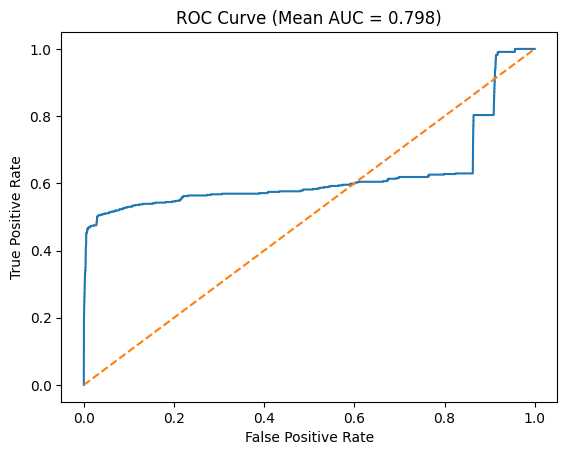

In [67]:
results = train_and_evaluate(X, y, plot=True)

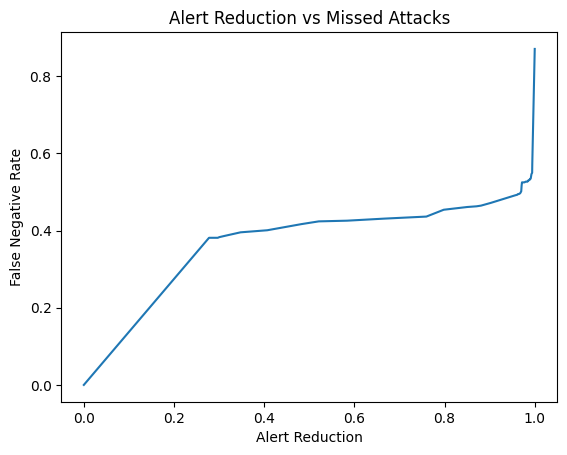

In [72]:
plot_alert_reduction(results["y_true"], results["proba"])


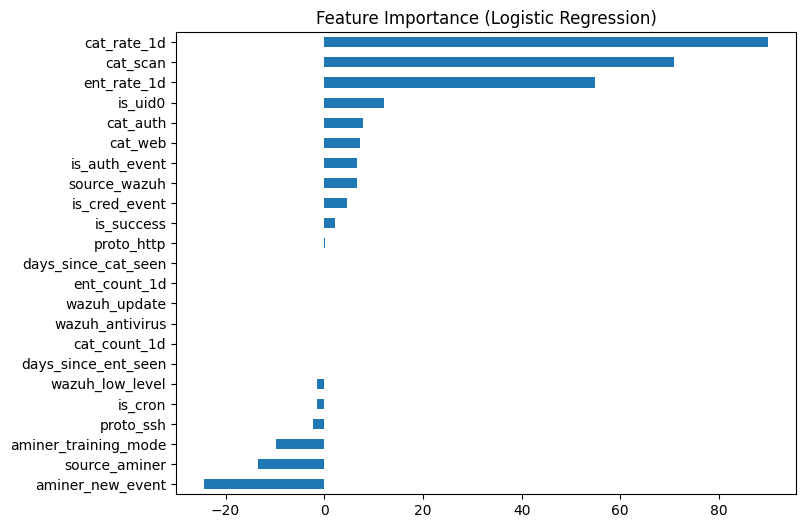

In [73]:
plot_feature_importance(results["model"], X)

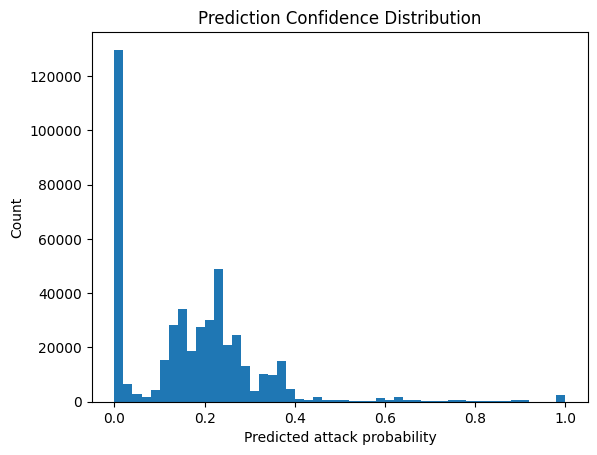

In [74]:
plot_confidence_distribution(results["proba"])